In [1]:
import os
os.getcwd()

# Make sure server_pull.py file is in the same working directory

'/Users/yeonjongjeong/Library/Mobile Documents/com~apple~CloudDocs/NUS MSBA/2023/Class/DBA5101 Analytics in Managerial Economics/Group Assisnment/3'

In [2]:
# Make sure you are connected to NUS wifi or NUS VPN in order to import and run this function
# see the link below
# https://webvpn.nus.edu.sg/dana-na/auth/url_52/welcome.cgi

# Use server_pull_updated
#from server_pull_updated import pull
from server_pull import pull

# pull function has the following syntax: pull(user_group, secret_key, arm)
# please change 'test_user' and 'aaaaaaaa' to your own user_group and secret_key respectively

output = pull('user32','cnERvnBr',23)
#output = pull('user32','cnERvnBr',2)
output

# output comes as a dictionary with 4 key-value pairs; 
# Arm you pulled, Net Reward so far, How many times you have pulled, and reward from current pull

{'Arm': '23', 'NetReward': 1049514, 'Pull': 49856, 'Reward': 9}

In [3]:
import numpy as np
import matplotlib.pyplot as plt

NetReward = 0
NetPull = 0
number_machine = 24

In [4]:
def pull(user_group, secret_key, machine_num):
    global NetReward
    global NetPull
    
    NetReward = NetReward + 1
    NetPull = NetPull + 1
    
    return {'Arm': str(machine_num), 'NetReward': NetReward, 'Pull':NetPull, 'Reward':  np.random.randint(0, 100)}

In [5]:
import random

def adaptive_epsilon_greedy(user_group, password, given_rounds, number_machine):
    
    # Initialize the result dict with arms and statistics
    result = {idx + 1: {
                        "Arm": idx + 1,
                        "Output_Arm": 0,
                        "Total": 0, 
                        "Reward_List": [], 
                        "Total_Reward": 0,
                        } for idx in range(number_machine)
             }
    # Intial Setting
    initial_epsilon = 1.0  # Starting value for epsilon
    min_epsilon = 0.01  # Minimum value for epsilon
    epsilon_decay = 0.995  # Decay rate for epsilon per round

    epsilon = initial_epsilon
    epsilons = []  # List of Chaning Epsilon (입실론의 변화를 추적하기 위한 리스트)
    
    # Learning Process for Exploitation / Exploration (학습 과정, 활용 vs 탐색)
    for num_round in range(1, given_rounds + 1):
        # Decide whether to explore or exploit
        if random.random() < epsilon:
            # Explore: randomly choose an arm
            arm = random.randint(1, number_machine)
            print(f"# {num_round}, Exploring Arm {arm}...")
        else:
            # Exploit: choose the arm with the highest average reward
            arm = max(result, key=lambda k: sum(result[k]["Reward_List"])/result[k]["Total"] if result[k]["Total"] > 0 else 0)
            print(f"# {num_round}, Exploiting Arm {arm}...")
        
        # Simulate pulling an arm and getting an output
        output = pull(user_group, password, arm)
        
        # Append Data
        result[arm]["Output_Arm"] = output["Arm"]
        result[arm]["Reward_List"].append(output["Reward"])
        result[arm]["Total"] += 1
        result[arm]["Total_Reward"] = sum(result[arm]["Reward_List"])
        
        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        epsilons.append(epsilon)
        
    return result


In [6]:
result = adaptive_epsilon_greedy("user32", "cnERvnBr", 100, 24)

if result:
    print("\nResults")
    for key in result.keys():
        print(result[key])

# 1, Exploring Arm 11...
# 2, Exploring Arm 17...
# 3, Exploring Arm 10...
# 4, Exploring Arm 15...
# 5, Exploring Arm 1...
# 6, Exploring Arm 3...
# 7, Exploring Arm 10...
# 8, Exploring Arm 7...
# 9, Exploring Arm 4...
# 10, Exploring Arm 22...
# 11, Exploring Arm 22...
# 12, Exploring Arm 13...
# 13, Exploring Arm 1...
# 14, Exploring Arm 21...
# 15, Exploring Arm 3...
# 16, Exploring Arm 9...
# 17, Exploring Arm 7...
# 18, Exploring Arm 9...
# 19, Exploring Arm 12...
# 20, Exploring Arm 24...
# 21, Exploring Arm 23...
# 22, Exploring Arm 5...
# 23, Exploring Arm 20...
# 24, Exploring Arm 24...
# 25, Exploring Arm 20...
# 26, Exploring Arm 15...
# 27, Exploring Arm 16...
# 28, Exploring Arm 21...
# 29, Exploring Arm 23...
# 30, Exploring Arm 15...
# 31, Exploring Arm 1...
# 32, Exploring Arm 4...
# 33, Exploring Arm 15...
# 34, Exploring Arm 19...
# 35, Exploring Arm 5...
# 36, Exploiting Arm 19...
# 37, Exploring Arm 15...
# 38, Exploring Arm 3...
# 39, Exploring Arm 22...
# 40, Ex

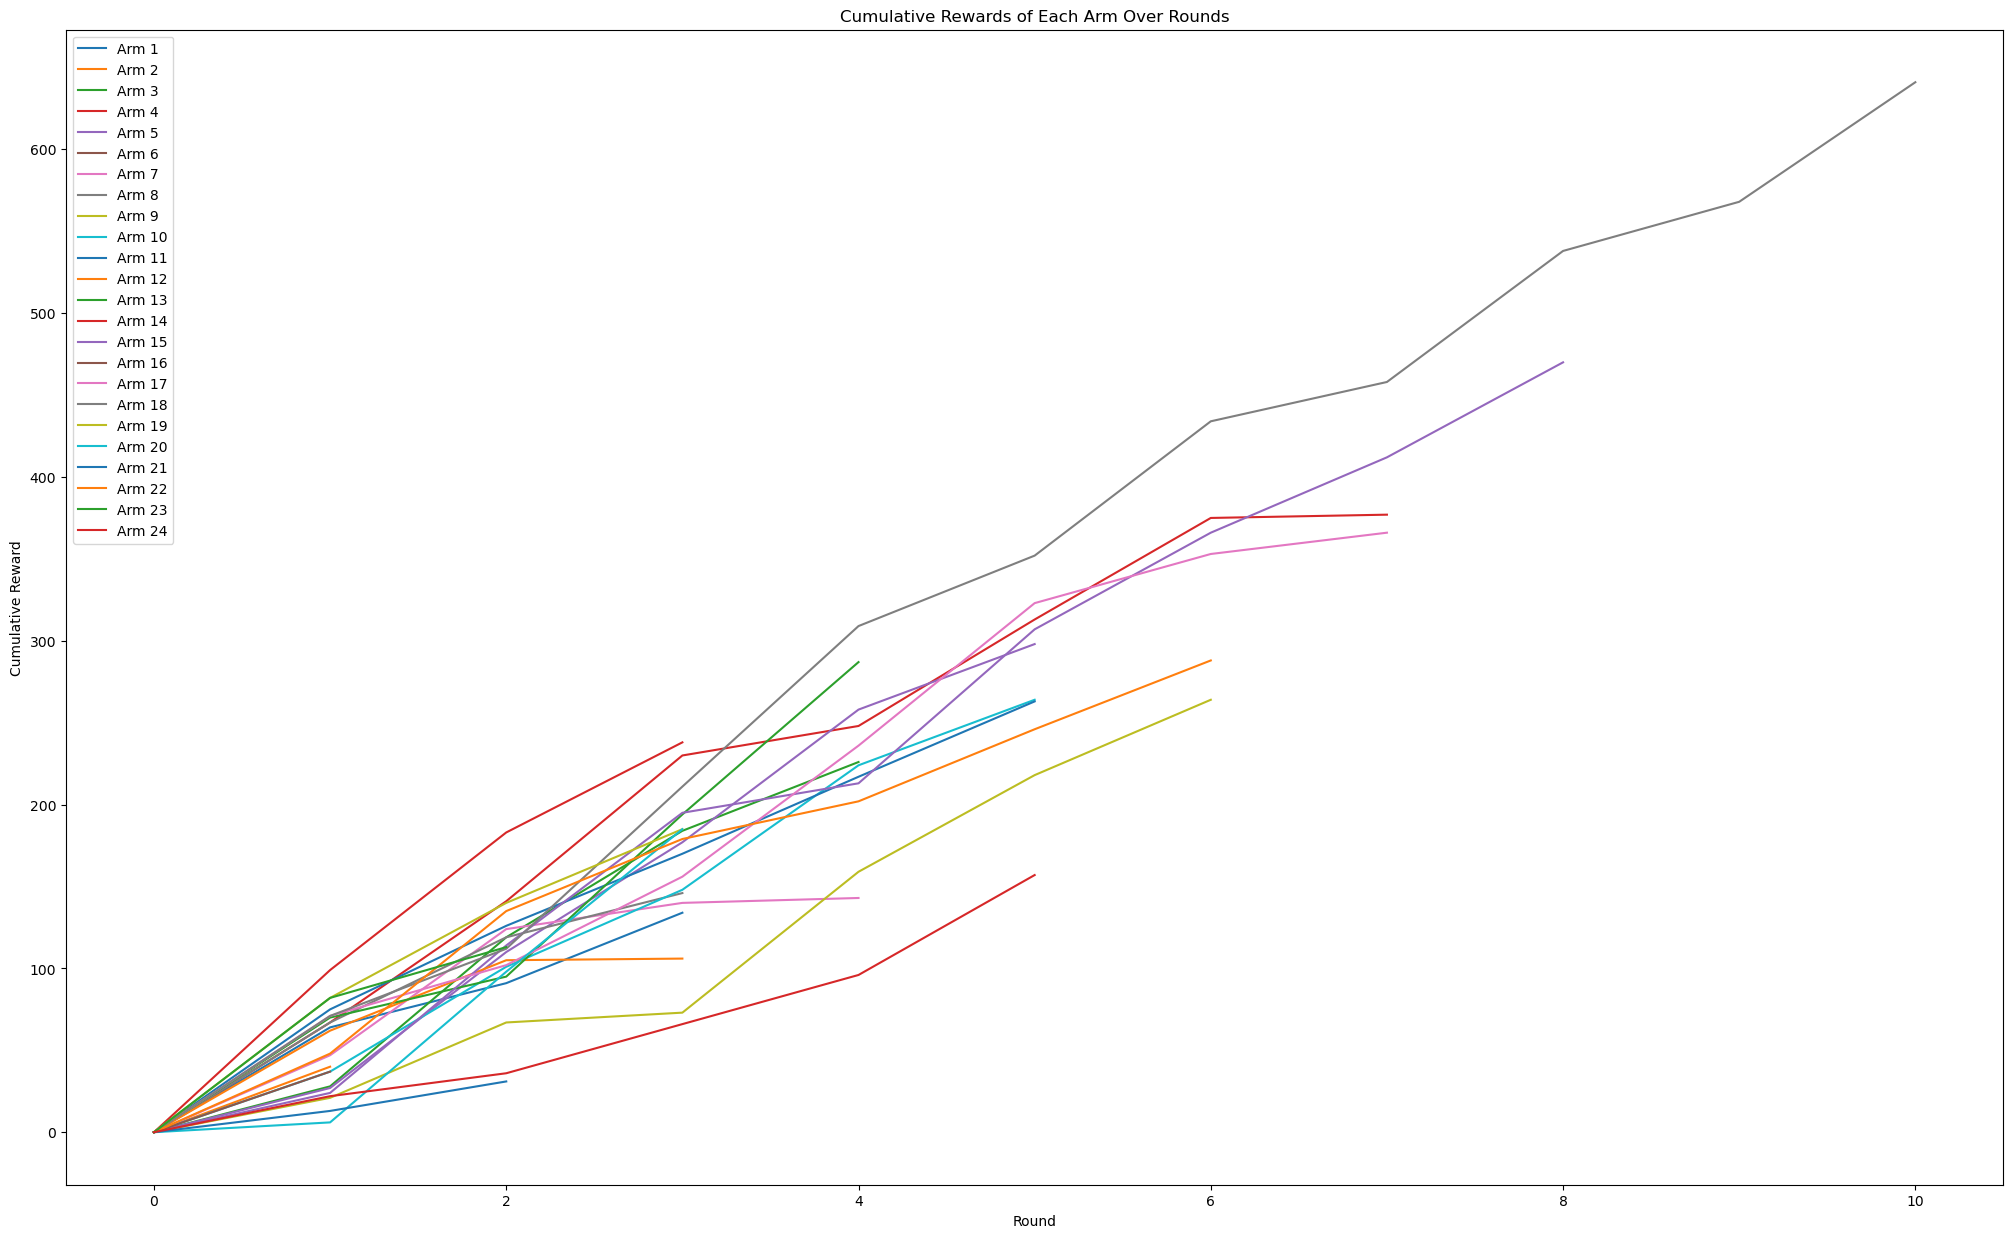

In [7]:
# 'result'는 위에서 얻은 결과 딕셔너리입니다.

# Reset the each of arm as List (각 암의 라운드별 누적 보상을 저장할 리스트를 초기화)
cumulative_rewards = {arm: [0] for arm in result}

# Accumulate the reward (누적 보상)
for arm in result:
    cumulative = 0
    for reward in result[arm]["Reward_List"]:
        cumulative += reward
        cumulative_rewards[arm].append(cumulative)

# Ploting Graph (그래프)
plt.figure(figsize=(25, 15))
for arm in cumulative_rewards:
    plt.plot(cumulative_rewards[arm], label=f"Arm {arm}")

# Add title and label (그래프 제목 및 축 레이블을 추가)
plt.title("Cumulative Rewards of Each Arm Over Rounds")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.show()
